### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pyodbc as py

### Connect to SQL Server in Local Host

In [ ]:
conn = py.connect("DRIVER=SQL SERVER;"
                    "SERVER=WALLY\MSSQLSERVER03;" ## local host database
                    "DATABASE=salesdata1;"
                    "Trusted_Connection=yes;"
)
cursor = conn.cursor()


<>:2: SyntaxWarning: invalid escape sequence '\M'
<>:2: SyntaxWarning: invalid escape sequence '\M'
C:\Users\user\AppData\Local\Temp\ipykernel_2276\1122513256.py:2: SyntaxWarning: invalid escape sequence '\M'
  "SERVER=WALLY\MSSQLSERVER03;"


### Insert Data to Sales Person

In [ ]:
salesPerson = [('John', 'Doe'), ('Jane', 'Smith'), ('Lionel', 'Messi'),
    ('Cristiano', 'Ronaldo'),('Kevin', 'De Bruyne'),
    ('Erling', 'Haaland'),('Kylian', 'Mbappé'),('Mohamed', 'Salah'),('Vinícius', 'Júnior'),
    ('Jude', 'Bellingham'),('Rodri', 'Hernández'),('Bukayo', 'Saka'), ('Victor', 'Osimhen'),
    ('Harry', 'Kane'),('Jamal', 'Musiala'),('Federico', 'Valverde'),('Antoine', 'Griezmann'),
    ('Declan', 'Rice'),('Martin', 'Ødegaard'), ('Alisson', 'Becker'),
    ('Lautaro', 'Martínez'),('Khvicha', 'Kvaratskhelia'),('Julian', 'Alvarez'),('Rafael', 'Leao'),
    ('Trent', 'Alexander-Arnold'),('Florian', 'Wirtz'),('Pedri', 'Gonzalez'),]
cursor.executemany("INSERT INTO SalesPerson (FirstName, LastName) VALUES (?, ?)", salesPerson)
conn.commit()


### Add Data into Customer

In [ ]:
Customer = [('Connor McDavid', 'AB', 1),('Leon Draisaitl', 'NRW', 2),('Nathan MacKinnon', 'NS', 3),
    ('Cale Makar', 'AB', 4), ('Auston Matthews', 'CA', 5),('Mitch Marner', 'ON', 6),
    ('Nikita Kucherov', 'KRS', 7),('Andrei Vasilevskiy', 'TYU', 8),('Sidney Crosby', 'NS', 9),
    ('Evgeni Malkin', 'MGN', 10),('Alexander Ovechkin', 'MOW', 11),('John Tavares', 'ON', 12),
    ('Steven Stamkos', 'ON', 13),('Brayden Point', 'AB', 14),('Jonathan Huberdeau', 'QC', 15),
    ('Matthew Tkachuk', 'AZ', 16),('Kirill Kaprizov', 'NVS', 17),('Sebastian Aho', 'PA', 18),
    ('Adam Fox', 'NY', 19),('Igor Shesterkin', 'MOW', 20),('Jack Eichel', 'MA', 21),
    ('Timo Meier', 'SG', 22),('Jason Robertson', 'CA', 23),('Roope Hintz', 'FI', 24),
    ('Miro Heiskanen', 'FI', 25)]

cursor.executemany("INSERT INTO Customer (Name, State, SalesPersonID) VALUES (?, ?, ?)", Customer)

conn.commit()

### Adding Data into Orders

In [33]:
Orders = [('26', '2025-8-3'), ('27', '2023-6-2'),
          ('28', '2024-01-10'), ('29', '2024-02-15'), ('30', '2024-03-20'),
          ('31', '2024-04-25'), ('32', '2024-05-30'), ('33', '2024-06-04'),
          ('34', '2024-07-09'), ('35', '2024-08-14'), ('36', '2024-09-19'),
          ('37', '2024-10-24'), ('38', '2024-11-29'), ('39', '2024-12-04'),
          ('40', '2025-01-08'), ('41', '2025-02-13'), ('42', '2025-03-18'),
          ('43', '2025-04-23'), ('44', '2025-05-28'), ('45', '2025-06-02'),
          ('46', '2025-07-07'), ('47', '2025-08-12'), ('48', '2025-09-17'),
          ('49', '2025-10-22'), ('50', '2025-11-27')]


cursor.executemany("INSERT INTO Orders (CustomerID, OrderDate) VALUES (?, ?)", Orders)

conn.commit()

### Inserting OrderDetail data

In [35]:
OrderDetail = [ (1025, 'Smart TV', 2, 1299),
    (1026, 'Brake Pads', 3, 249),(1027, 'Leather Sofa', 1, 1899),(1028, 'Gaming Laptop', 1, 2499),
    (1029, 'Oil Filter', 2, 219),(1030, 'Coffee Table', 1, 599),(1031, 'Wireless Headphones', 2, 349),
    (1032, 'Alternator', 1, 599),(1033, 'Dining Set', 1, 1799),(1034, 'Smartphone', 3, 1099),
    (1035, 'Car Battery', 1, 289),(1036, 'Recliner Chair', 2, 899),(1037, 'Bluetooth Speaker', 3, 399),
    (1038, 'Spark Plugs', 3, 229),(1039, 'Bookshelf', 1, 649),(1040, 'Tablet', 2, 899),
    (1041, 'Transmission Fluid', 3, 209), (1042, 'Wardrobe', 1, 1599),(1043, 'Digital Camera', 1, 1299),
    (1044, 'Windshield Wipers', 2, 249),(1045, 'Office Desk', 1, 899),(1046, 'Smart Watch', 3, 449),
    (1047, 'Tire Set', 1, 1199),(1048, 'Bed Frame', 1, 1499),(1049, 'Computer Monitor', 2, 799)]

cursor.executemany("INSERT INTO OrderDetail (OrderNumber, ItemName,Quantity, PriceUSD) VALUES (?, ?, ?, ?)", OrderDetail)

conn.commit()

### Fetching data

In [14]:
df = pd.read_sql("SELECT Name, SUM(Quantity * PriceUSD) AS TotalSales FROM Orders o JOIN OrderDetail od ON o.OrderNumber = od.OrderNumber JOIN Customer c ON o.CustomerID = c.CustomerID GROUP BY Name", conn)


C:\Users\user\AppData\Local\Temp\ipykernel_22292\1492891469.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT Name, SUM(Quantity * PriceUSD) AS TotalSales FROM Orders o JOIN OrderDetail od ON o.OrderNumber = od.OrderNumber JOIN Customer c ON o.CustomerID = c.CustomerID GROUP BY Name", conn)



### Plot Sales by Customer

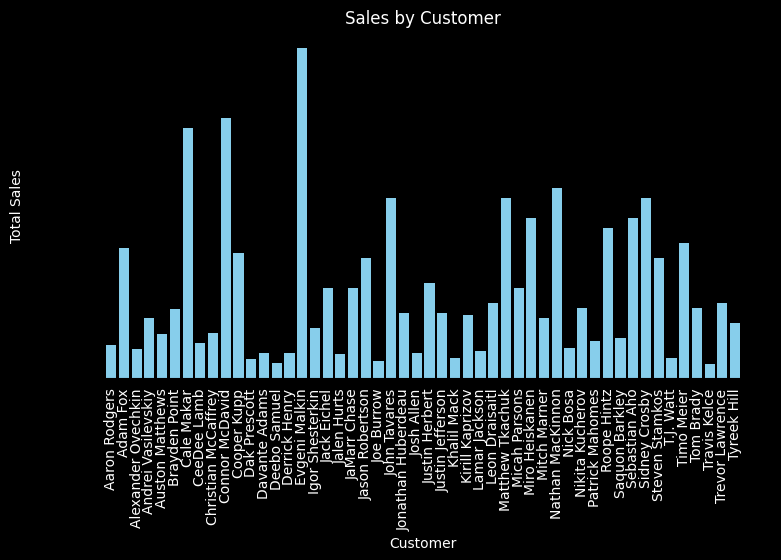

In [24]:
plt.figure(figsize=(9,4.5), facecolor="black")
plt.bar(df["Name"], df["TotalSales"], color='skyblue')
plt.xlabel("Customer", color="white")
plt.ylabel("Total Sales", color="white")
plt.title("Sales by Customer", color="white")
plt.xticks(rotation=90, color="white")
ax = plt.gca()  # Get current axes
ax.set_facecolor('black') 
plt.show()

In [3]:
df1 = pd.read_sql("SELECT c.State, SUM(od.Quantity * od.PriceUSD) AS TotalSales FROM Orders o JOIN OrderDetail od ON o.OrderNumber = od.OrderNumber JOIN Customer c ON o.CustomerID = c.CustomerID GROUP BY c.State", conn)

C:\Users\user\AppData\Local\Temp\ipykernel_2276\778699859.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql("SELECT c.State, SUM(od.Quantity * od.PriceUSD) AS TotalSales FROM Orders o JOIN OrderDetail od ON o.OrderNumber = od.OrderNumber JOIN Customer c ON o.CustomerID = c.CustomerID GROUP BY c.State", conn)


### Plot Sales by State

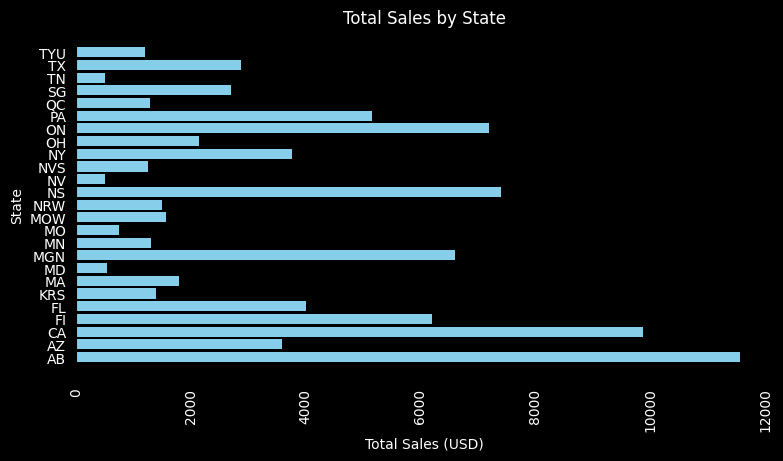

In [4]:
plt.figure(figsize=(9,4.5), facecolor="black")
plt.barh(df1['State'], df1['TotalSales'], color='skyblue')
plt.xlabel('Total Sales (USD)', color="white")
plt.ylabel('State', color="white")
plt.title('Total Sales by State', color="white")
plt.yticks(color="white")
plt.xticks(rotation=90, color="white")
ax = plt.gca()  # Get current axes
ax.set_facecolor('black') 
plt.show()

### Closing the Connection

In [5]:
cursor.close()
conn.close()